In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [ ]:
train_data = pd.read_csv('tamil_news_train.csv')
test_data = pd.read_csv('tamil_news_test.csv')

In [ ]:
train_data

,NewsInEnglish,NewsInTamil,Category,CategoryInTamil
0,2017/May/19941-miss-iraq-competition-after-43-...,ஈராக்கில் 43 ஆண்டுகள் கழித்து அழகிப்போட்டி,world,உலகம்
1,2018/Dec/55921-viswasam-s-rustic-folk-song-has...,இந்திய அளவில் ட்ரெண்ட் ஆன அஜித்தின் ‘தள்லே தில...,cinema,சினிமா
2,2018/Dec/55929-inspector-who-bought-insurance-...,சொந்த செலவில் வாகன காப்பீடு எடுத்து கொடுத்த கா...,tamilnadu,தமிழ்நாடு
3,2017/Jan/16161-morarji-desai-budget.txt,பிறந்தநாளில் பட்ஜெட் தாக்கல் செய்தவர்,india,இந்தியா
4,2018/Jun/46476-i-have-not-joined-bjp-or-anyoth...,“நானா? பாஜகவில் இணைந்துவிட்டேனா” - வரலட்சுமி வ...,cinema,சினிமா
...,...,...,...,...
14516,2018/Apr/43310-karnataka-assembly-elections-20...,‘மோடி கூட்டத்தில் கலகம் செய்யுங்கள்’: ஜிக்னேஷ்...,politics,அரசியல்
14517,2017/Dec/38185-the-police-made-elaborate-arran...,"புத்தாண்டு கொண்டாட்டம்: சென்னையில் 3,500 போலீச...",tamilnadu,தமிழ்நாடு
14518,2018/Jun/47685-chennai-hdfc-customer-money-the...,‘இரும்புத்திரை’ பட பாணியில் திருட்டு,tamilnadu,தமிழ்நாடு
14519,2018/Aug/49520-pv-sindhu-settles-for-second-su...,தங்க மங்கை பி.வி.சிந்துவின் சாதனைக் களங்கள் !,india,இந்தியா


In [ ]:
train_data['Category'].value_counts()

tamilnadu    5028
india        3443
cinema       2050
sports       1701
politics     1200
world        1099
Name: Category, dtype: int64

In [ ]:
test_data['Category'].value_counts()

tamilnadu    1219
india         925
cinema        485
sports        439
politics      287
world         276
Name: Category, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

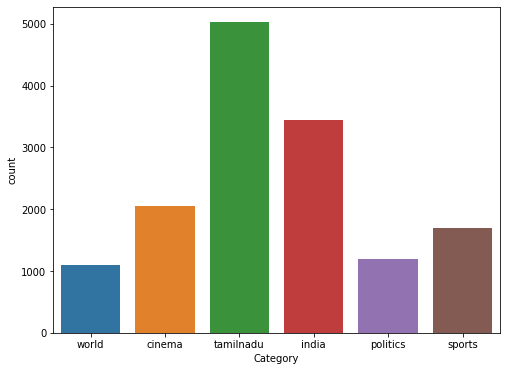

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(train_data.Category)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

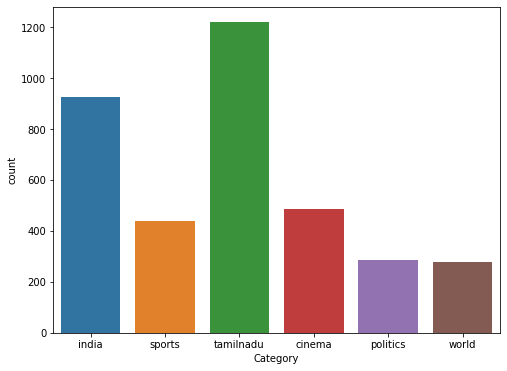

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(test_data.Category)

In [ ]:
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

def remove_punc(data):
    result = []

    for test_str in data.NewsInTamil:
        for ele in test_str:
            if ele in punc:
                test_str = test_str.replace(ele, "")
        result.append(test_str)
    
    return result

In [ ]:
train_res = remove_punc(train_data)
train_data['WithoutPunc'] = train_res
train_data

,NewsInEnglish,NewsInTamil,Category,CategoryInTamil,WithoutPunc
0,2017/May/19941-miss-iraq-competition-after-43-...,ஈராக்கில் 43 ஆண்டுகள் கழித்து அழகிப்போட்டி,world,உலகம்,ஈராக்கில் 43 ஆண்டுகள் கழித்து அழகிப்போட்டி
1,2018/Dec/55921-viswasam-s-rustic-folk-song-has...,இந்திய அளவில் ட்ரெண்ட் ஆன அஜித்தின் ‘தள்லே தில...,cinema,சினிமா,இந்திய அளவில் ட்ரெண்ட் ஆன அஜித்தின் ‘தள்லே தில...
2,2018/Dec/55929-inspector-who-bought-insurance-...,சொந்த செலவில் வாகன காப்பீடு எடுத்து கொடுத்த கா...,tamilnadu,தமிழ்நாடு,சொந்த செலவில் வாகன காப்பீடு எடுத்து கொடுத்த கா...
3,2017/Jan/16161-morarji-desai-budget.txt,பிறந்தநாளில் பட்ஜெட் தாக்கல் செய்தவர்,india,இந்தியா,பிறந்தநாளில் பட்ஜெட் தாக்கல் செய்தவர்
4,2018/Jun/46476-i-have-not-joined-bjp-or-anyoth...,“நானா? பாஜகவில் இணைந்துவிட்டேனா” - வரலட்சுமி வ...,cinema,சினிமா,“நானா பாஜகவில் இணைந்துவிட்டேனா” வரலட்சுமி விள...
...,...,...,...,...,...
14516,2018/Apr/43310-karnataka-assembly-elections-20...,‘மோடி கூட்டத்தில் கலகம் செய்யுங்கள்’: ஜிக்னேஷ்...,politics,அரசியல்,‘மோடி கூட்டத்தில் கலகம் செய்யுங்கள்’ ஜிக்னேஷ் ...
14517,2017/Dec/38185-the-police-made-elaborate-arran...,"புத்தாண்டு கொண்டாட்டம்: சென்னையில் 3,500 போலீச...",tamilnadu,தமிழ்நாடு,புத்தாண்டு கொண்டாட்டம் சென்னையில் 3500 போலீசார...
14518,2018/Jun/47685-chennai-hdfc-customer-money-the...,‘இரும்புத்திரை’ பட பாணியில் திருட்டு,tamilnadu,தமிழ்நாடு,‘இரும்புத்திரை’ பட பாணியில் திருட்டு
14519,2018/Aug/49520-pv-sindhu-settles-for-second-su...,தங்க மங்கை பி.வி.சிந்துவின் சாதனைக் களங்கள் !,india,இந்தியா,தங்க மங்கை பிவிசிந்துவின் சாதனைக் களங்கள்


In [ ]:
test_res = remove_punc(test_data)
test_data['WithoutPunc'] = test_res
test_data

,NewsInEnglish,NewsInTamil,Category,CategoryInTamil,WithoutPunc
0,2017/Jun/21972-groom-chewing-gutka-during-wedd...,தாலி கட்ற நேரத்துலயும் குட்காவா? மணமகனை உதறினா...,india,இந்தியா,தாலி கட்ற நேரத்துலயும் குட்காவா மணமகனை உதறினார...
1,2018/Nov/54005-indvswi-3rd-t20-west-indies-won...,3வது டி20 : வெஸ்ட் இண்டீஸ் முதல் பேட்டிங் - வா...,sports,விளையாட்டு,3வது டி20 வெஸ்ட் இண்டீஸ் முதல் பேட்டிங் வாஷி...
2,2018/Dec/55960-lkg-ukg-classes-will-be-started...,"பெற்றோர்கள் விருப்பத்திற்கு ஏற்ப எல்.கே.ஜி., ய...",tamilnadu,தமிழ்நாடு,பெற்றோர்கள் விருப்பத்திற்கு ஏற்ப எல்கேஜி யுகேஜ...
3,2018/Mar/41755-college-student-murder-in-chenn...,சென்னையில் கல்லூரி வாசலில் மாணவி குத்திக்கொலை,tamilnadu,தமிழ்நாடு,சென்னையில் கல்லூரி வாசலில் மாணவி குத்திக்கொலை
4,2018/Sep/51691-fever-in-uttar-pradesh-71-child...,உ.பி.யில் காய்ச்சலால் 45 நாட்களில் 71 குழந்தைக...,india,இந்தியா,உபியில் காய்ச்சலால் 45 நாட்களில் 71 குழந்தைகள்...
...,...,...,...,...,...
3626,2018/Oct/52110-govt-owes-air-india-over-rs-114...,விஐபி-கள் பயணம்: ஏர் இந்தியாவுக்கு மத்திய அரசு...,india,இந்தியா,விஐபிகள் பயணம் ஏர் இந்தியாவுக்கு மத்திய அரசு ர...
3627,2018/Dec/55702-gangsters-open-fire-at-kochi-be...,நடிகையின் பியூட்டி பார்லரில் துப்பாக்கிச் சூடு...,cinema,சினிமா,நடிகையின் பியூட்டி பார்லரில் துப்பாக்கிச் சூடு...
3628,2018/Dec/56010-uae-based-indian-girl-planned-t...,போட்டோ ட்ரோல் ஆனதால் விரக்தி - நேரலையில் இளம்ப...,world,உலகம்,போட்டோ ட்ரோல் ஆனதால் விரக்தி நேரலையில் இளம்பெ...
3629,2018/Oct/52539-aims-issue-vijayabaskar-to-meet...,எய்ம்ஸ் விவகாரம்.. மத்திய அமைச்சரை சந்திக்கிறா...,india,இந்தியா,எய்ம்ஸ் விவகாரம் மத்திய அமைச்சரை சந்திக்கிறார்...


In [ ]:
def get_category_as_vector(data):
    tn, ind, cin, sp, pol, wo = [], [], [], [], [], []
    for i in data['Category']:
        if i == 'tamilnadu':
            tn.append(1)
            ind.append(0)
            cin.append(0)
            sp.append(0)
            pol.append(0)
            wo.append(0)
        elif i == 'india':
            tn.append(0)
            ind.append(1)
            cin.append(0)
            sp.append(0)
            pol.append(0)
            wo.append(0)
        elif i == 'cinema':
            tn.append(0)
            ind.append(0)
            cin.append(1)
            sp.append(0)
            pol.append(0)
            wo.append(0)
        elif i == 'sports':
            tn.append(0)
            ind.append(0)
            cin.append(0)
            sp.append(1)
            pol.append(0)
            wo.append(0)
        elif i == 'politics':
            tn.append(0)
            ind.append(0)
            cin.append(0)
            sp.append(0)
            pol.append(1)
            wo.append(0)
        else:
            tn.append(0)
            ind.append(0)
            cin.append(0)
            sp.append(0)
            pol.append(0)
            wo.append(1)
    
    return tn, ind, cin, sp, pol, wo

In [ ]:
tn, ind, cin, sp, pol, wo = get_category_as_vector(train_data)
train_data['tn'] = tn
train_data['ind'] = ind
train_data['cin'] = cin
train_data['sp'] = sp
train_data['pol'] = pol
train_data['wo'] = wo

train_data

,NewsInEnglish,NewsInTamil,Category,CategoryInTamil,WithoutPunc,tn,ind,cin,sp,pol,wo
0,2017/May/19941-miss-iraq-competition-after-43-...,ஈராக்கில் 43 ஆண்டுகள் கழித்து அழகிப்போட்டி,world,உலகம்,ஈராக்கில் 43 ஆண்டுகள் கழித்து அழகிப்போட்டி,0,0,0,0,0,1
1,2018/Dec/55921-viswasam-s-rustic-folk-song-has...,இந்திய அளவில் ட்ரெண்ட் ஆன அஜித்தின் ‘தள்லே தில...,cinema,சினிமா,இந்திய அளவில் ட்ரெண்ட் ஆன அஜித்தின் ‘தள்லே தில...,0,0,1,0,0,0
2,2018/Dec/55929-inspector-who-bought-insurance-...,சொந்த செலவில் வாகன காப்பீடு எடுத்து கொடுத்த கா...,tamilnadu,தமிழ்நாடு,சொந்த செலவில் வாகன காப்பீடு எடுத்து கொடுத்த கா...,1,0,0,0,0,0
3,2017/Jan/16161-morarji-desai-budget.txt,பிறந்தநாளில் பட்ஜெட் தாக்கல் செய்தவர்,india,இந்தியா,பிறந்தநாளில் பட்ஜெட் தாக்கல் செய்தவர்,0,1,0,0,0,0
4,2018/Jun/46476-i-have-not-joined-bjp-or-anyoth...,“நானா? பாஜகவில் இணைந்துவிட்டேனா” - வரலட்சுமி வ...,cinema,சினிமா,“நானா பாஜகவில் இணைந்துவிட்டேனா” வரலட்சுமி விள...,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14516,2018/Apr/43310-karnataka-assembly-elections-20...,‘மோடி கூட்டத்தில் கலகம் செய்யுங்கள்’: ஜிக்னேஷ்...,politics,அரசியல்,‘மோடி கூட்டத்தில் கலகம் செய்யுங்கள்’ ஜிக்னேஷ் ...,0,0,0,0,1,0
14517,2017/Dec/38185-the-police-made-elaborate-arran...,"புத்தாண்டு கொண்டாட்டம்: சென்னையில் 3,500 போலீச...",tamilnadu,தமிழ்நாடு,புத்தாண்டு கொண்டாட்டம் சென்னையில் 3500 போலீசார...,1,0,0,0,0,0
14518,2018/Jun/47685-chennai-hdfc-customer-money-the...,‘இரும்புத்திரை’ பட பாணியில் திருட்டு,tamilnadu,தமிழ்நாடு,‘இரும்புத்திரை’ பட பாணியில் திருட்டு,1,0,0,0,0,0
14519,2018/Aug/49520-pv-sindhu-settles-for-second-su...,தங்க மங்கை பி.வி.சிந்துவின் சாதனைக் களங்கள் !,india,இந்தியா,தங்க மங்கை பிவிசிந்துவின் சாதனைக் களங்கள்,0,1,0,0,0,0


In [ ]:
tn, ind, cin, sp, pol, wo = get_category_as_vector(test_data)
test_data['tn'] = tn
test_data['ind'] = ind
test_data['cin'] = cin
test_data['sp'] = sp
test_data['pol'] = pol
test_data['wo'] = wo

test_data

,NewsInEnglish,NewsInTamil,Category,CategoryInTamil,WithoutPunc,tn,ind,cin,sp,pol,wo
0,2017/Jun/21972-groom-chewing-gutka-during-wedd...,தாலி கட்ற நேரத்துலயும் குட்காவா? மணமகனை உதறினா...,india,இந்தியா,தாலி கட்ற நேரத்துலயும் குட்காவா மணமகனை உதறினார...,0,1,0,0,0,0
1,2018/Nov/54005-indvswi-3rd-t20-west-indies-won...,3வது டி20 : வெஸ்ட் இண்டீஸ் முதல் பேட்டிங் - வா...,sports,விளையாட்டு,3வது டி20 வெஸ்ட் இண்டீஸ் முதல் பேட்டிங் வாஷி...,0,0,0,1,0,0
2,2018/Dec/55960-lkg-ukg-classes-will-be-started...,"பெற்றோர்கள் விருப்பத்திற்கு ஏற்ப எல்.கே.ஜி., ய...",tamilnadu,தமிழ்நாடு,பெற்றோர்கள் விருப்பத்திற்கு ஏற்ப எல்கேஜி யுகேஜ...,1,0,0,0,0,0
3,2018/Mar/41755-college-student-murder-in-chenn...,சென்னையில் கல்லூரி வாசலில் மாணவி குத்திக்கொலை,tamilnadu,தமிழ்நாடு,சென்னையில் கல்லூரி வாசலில் மாணவி குத்திக்கொலை,1,0,0,0,0,0
4,2018/Sep/51691-fever-in-uttar-pradesh-71-child...,உ.பி.யில் காய்ச்சலால் 45 நாட்களில் 71 குழந்தைக...,india,இந்தியா,உபியில் காய்ச்சலால் 45 நாட்களில் 71 குழந்தைகள்...,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3626,2018/Oct/52110-govt-owes-air-india-over-rs-114...,விஐபி-கள் பயணம்: ஏர் இந்தியாவுக்கு மத்திய அரசு...,india,இந்தியா,விஐபிகள் பயணம் ஏர் இந்தியாவுக்கு மத்திய அரசு ர...,0,1,0,0,0,0
3627,2018/Dec/55702-gangsters-open-fire-at-kochi-be...,நடிகையின் பியூட்டி பார்லரில் துப்பாக்கிச் சூடு...,cinema,சினிமா,நடிகையின் பியூட்டி பார்லரில் துப்பாக்கிச் சூடு...,0,0,1,0,0,0
3628,2018/Dec/56010-uae-based-indian-girl-planned-t...,போட்டோ ட்ரோல் ஆனதால் விரக்தி - நேரலையில் இளம்ப...,world,உலகம்,போட்டோ ட்ரோல் ஆனதால் விரக்தி நேரலையில் இளம்பெ...,0,0,0,0,0,1
3629,2018/Oct/52539-aims-issue-vijayabaskar-to-meet...,எய்ம்ஸ் விவகாரம்.. மத்திய அமைச்சரை சந்திக்கிறா...,india,இந்தியா,எய்ம்ஸ் விவகாரம் மத்திய அமைச்சரை சந்திக்கிறார்...,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [ ]:
max_len = 50 
trunc_type = "post" 
padding_type = "post" 

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenize = Tokenizer(num_words = 5000, char_level=False, oov_token = "<OOV>")
tokenize.fit_on_texts(train_data.WithoutPunc)

word_index = tokenize.word_index
word_index

{'<OOV>': 1,
 'அரசு': 2,
 'மீது': 3,
 'பேர்': 4,
 'கைது': 5,
 'இன்று': 6,
 'மத்திய': 7,
 'தமிழக': 8,
 'இந்திய': 9,
 'புதிய': 10,
 'வழக்கு': 11,
 'அமைச்சர்': 12,
 'புகார்': 13,
 'பிரதமர்': 14,
 'மீண்டும்': 15,
 'ஒரு': 16,
 'பாலியல்': 17,
 'முதல்': 18,
 'நடிகர்': 19,
 'நாளை': 20,
 'விவகாரம்': 21,
 'தடை': 22,
 'மோடி': 23,
 'போராட்டம்': 24,
 'பெண்': 25,
 'முதலமைச்சர்': 26,
 'ஸ்டாலின்': 27,
 'மக்கள்': 28,
 'உத்தரவு': 29,
 'விளக்கம்': 30,
 'தகவல்': 31,
 'பலி': 32,
 '2': 33,
 'உயிரிழப்பு': 34,
 'வேண்டும்': 35,
 'தேர்தல்': 36,
 'என்ன': 37,
 'பாஜக': 38,
 'வீடியோ': 39,
 'இல்லை': 40,
 'அறிவிப்பு': 41,
 'ஏன்': 42,
 'கோடி': 43,
 'இந்தியா': 44,
 'அணி': 45,
 'இருந்து': 46,
 '3': 47,
 'போலீஸ்': 48,
 'நடிகை': 49,
 'லட்சம்': 50,
 'விசாரணை': 51,
 'கேள்வி': 52,
 'விஜய்': 53,
 'முதல்வர்': 54,
 'சென்னை': 55,
 'உயர்நீதிமன்றம்': 56,
 'வெற்றி': 57,
 'செய்ய': 58,
 'கிரிக்கெட்': 59,
 'அதிரடி': 60,
 '5': 61,
 'தற்கொலை': 62,
 'விபத்து': 63,
 'புயல்': 64,
 'நீதிமன்றம்': 65,
 'மனு': 66,
 'கோலி': 67,
 '\xa0': 68,
 'ச

In [ ]:
training_sequenc = tokenize.texts_to_sequences(train_data.WithoutPunc)
training_padd = pad_sequences(training_sequenc, maxlen = max_len, padding = padding_type, truncating = trunc_type)
testing_sequenc = tokenize.texts_to_sequences(test_data.WithoutPunc)
testing_padd = pad_sequences(testing_sequenc, maxlen = max_len, padding = padding_type, truncating = trunc_type)

In [ ]:
training_padd

array([[   1, 2227,  432, ...,    0,    0,    0],
       [   9,  818, 1427, ...,    0,    0,    0],
       [ 767, 3029, 1108, ...,    0,    0,    0],
       ...,
       [   1,  415, 1429, ...,    0,    0,    0],
       [ 492,    1,    1, ...,    0,    0,    0],
       [ 496,  478,  422, ...,    0,    0,    0]], dtype=int32)

In [ ]:
training_padd.shape

(14521, 50)

In [ ]:
testing_padd.shape

(3631, 50)

In [ ]:
predict_msg1=['சென்னையில் பெண் கொல்லப்பட்டார்']
predict_msg2=['டெல்லியில் பூகம்பம்']
predict_msg3=['நடிகர் போதைப்பொருள் பயன்படுத்தி பிடிபட்டார்']
predict_msg4=['கால்பந்து ரசிகர்களை இழந்து வருகிறது']
predict_msg5=['சுயேச்சை அமைச்சரை டிஸ்மிஸ்']
predict_msg6=['மலேசிய விமானம் காணவில்லை']

In [ ]:
n_lstm = 20
drop_lstm =0.2
vocab_s = 5000
embed_dim = 16
drp_vale = 0.2 
n_dense = 24

originally the number of epochs is 50

In [ ]:
tn_lstm = Sequential()
tn_lstm.add(Embedding(vocab_s, embed_dim, input_length=max_len))
tn_lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
tn_lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
tn_lstm.add(Dense(1, activation='sigmoid'))
tn_lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

num_epochs = 10
#early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = tn_lstm.fit(training_padd, train_data['tn'], epochs=num_epochs, validation_data=(testing_padd, test_data['tn']), verbose=2)

Epoch 1/10
454/454 - 38s - loss: 0.5629 - accuracy: 0.7193 - val_loss: 0.4341 - val_accuracy: 0.8045 - 38s/epoch - 84ms/step
Epoch 2/10
454/454 - 21s - loss: 0.3457 - accuracy: 0.8579 - val_loss: 0.4045 - val_accuracy: 0.8340 - 21s/epoch - 46ms/step
Epoch 3/10
454/454 - 22s - loss: 0.2833 - accuracy: 0.8875 - val_loss: 0.4136 - val_accuracy: 0.8395 - 22s/epoch - 49ms/step
Epoch 4/10
454/454 - 24s - loss: 0.2553 - accuracy: 0.9012 - val_loss: 0.3981 - val_accuracy: 0.8443 - 24s/epoch - 53ms/step
Epoch 5/10
454/454 - 22s - loss: 0.2281 - accuracy: 0.9124 - val_loss: 0.3947 - val_accuracy: 0.8451 - 22s/epoch - 49ms/step
Epoch 6/10
454/454 - 24s - loss: 0.2133 - accuracy: 0.9164 - val_loss: 0.4021 - val_accuracy: 0.8463 - 24s/epoch - 52ms/step
Epoch 7/10
454/454 - 22s - loss: 0.1935 - accuracy: 0.9251 - val_loss: 0.4350 - val_accuracy: 0.8480 - 22s/epoch - 48ms/step
Epoch 8/10
454/454 - 23s - loss: 0.1821 - accuracy: 0.9284 - val_loss: 0.4741 - val_accuracy: 0.8502 - 23s/epoch - 50ms/step


In [ ]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

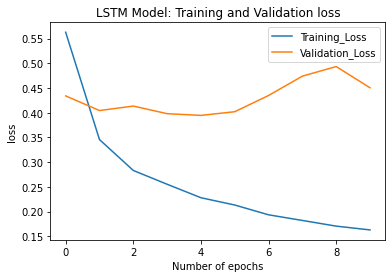

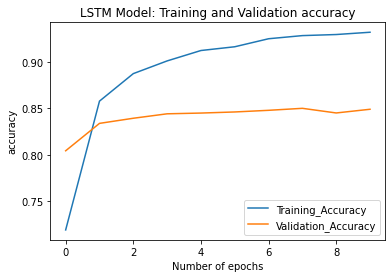

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
ind_lstm = Sequential()
ind_lstm.add(Embedding(vocab_s, embed_dim, input_length=max_len))
ind_lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
ind_lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
ind_lstm.add(Dense(1, activation='sigmoid'))
ind_lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

num_epochs = 10
#early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = ind_lstm.fit(training_padd, train_data['ind'], epochs=num_epochs, validation_data=(testing_padd, test_data['ind']), verbose=2)

Epoch 1/10
454/454 - 31s - loss: 0.5317 - accuracy: 0.7720 - val_loss: 0.4234 - val_accuracy: 0.8045 - 31s/epoch - 67ms/step
Epoch 2/10
454/454 - 23s - loss: 0.3285 - accuracy: 0.8662 - val_loss: 0.3851 - val_accuracy: 0.8409 - 23s/epoch - 51ms/step
Epoch 3/10
454/454 - 21s - loss: 0.2539 - accuracy: 0.9011 - val_loss: 0.3867 - val_accuracy: 0.8485 - 21s/epoch - 47ms/step
Epoch 4/10
454/454 - 22s - loss: 0.2198 - accuracy: 0.9172 - val_loss: 0.3614 - val_accuracy: 0.8548 - 22s/epoch - 49ms/step
Epoch 5/10
454/454 - 22s - loss: 0.1976 - accuracy: 0.9238 - val_loss: 0.3591 - val_accuracy: 0.8577 - 22s/epoch - 49ms/step
Epoch 6/10
454/454 - 23s - loss: 0.1835 - accuracy: 0.9295 - val_loss: 0.3774 - val_accuracy: 0.8607 - 23s/epoch - 50ms/step
Epoch 7/10
454/454 - 22s - loss: 0.1669 - accuracy: 0.9348 - val_loss: 0.4056 - val_accuracy: 0.8608 - 22s/epoch - 49ms/step
Epoch 8/10
454/454 - 22s - loss: 0.1540 - accuracy: 0.9414 - val_loss: 0.3853 - val_accuracy: 0.8651 - 22s/epoch - 49ms/step


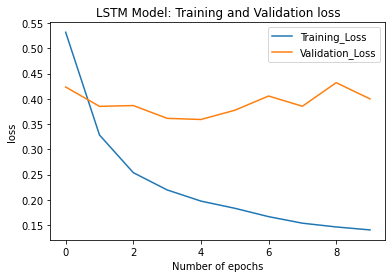

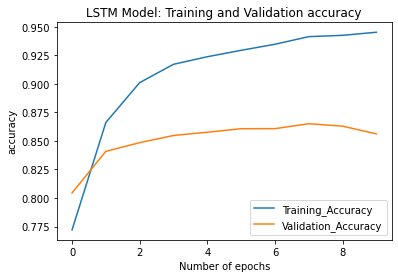

In [ ]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
wo_lstm = Sequential()
wo_lstm.add(Embedding(vocab_s, embed_dim, input_length=max_len))
wo_lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
wo_lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
wo_lstm.add(Dense(1, activation='sigmoid'))
wo_lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

num_epochs = 10
#early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = wo_lstm.fit(training_padd, train_data['wo'], epochs=num_epochs, validation_data=(testing_padd, test_data['wo']), verbose=2)

Epoch 1/10
454/454 - 33s - loss: 0.3025 - accuracy: 0.9239 - val_loss: 0.2748 - val_accuracy: 0.9240 - 33s/epoch - 73ms/step
Epoch 2/10
454/454 - 24s - loss: 0.2607 - accuracy: 0.9278 - val_loss: 0.2351 - val_accuracy: 0.9360 - 24s/epoch - 52ms/step
Epoch 3/10
454/454 - 22s - loss: 0.1662 - accuracy: 0.9571 - val_loss: 0.1791 - val_accuracy: 0.9503 - 22s/epoch - 49ms/step
Epoch 4/10
454/454 - 23s - loss: 0.1327 - accuracy: 0.9655 - val_loss: 0.1952 - val_accuracy: 0.9508 - 23s/epoch - 50ms/step
Epoch 5/10
454/454 - 24s - loss: 0.1123 - accuracy: 0.9704 - val_loss: 0.1806 - val_accuracy: 0.9520 - 24s/epoch - 52ms/step
Epoch 6/10
454/454 - 23s - loss: 0.0920 - accuracy: 0.9737 - val_loss: 0.1719 - val_accuracy: 0.9534 - 23s/epoch - 51ms/step
Epoch 7/10
454/454 - 24s - loss: 0.0893 - accuracy: 0.9753 - val_loss: 0.1682 - val_accuracy: 0.9532 - 24s/epoch - 53ms/step
Epoch 8/10
454/454 - 24s - loss: 0.0765 - accuracy: 0.9784 - val_loss: 0.1624 - val_accuracy: 0.9543 - 24s/epoch - 54ms/step


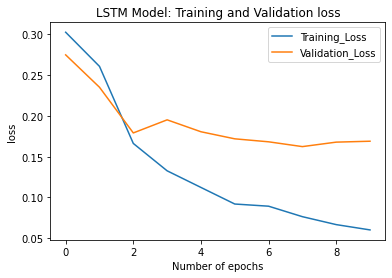

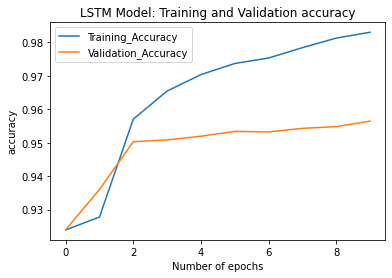

In [ ]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
sp_lstm = Sequential()
sp_lstm.add(Embedding(vocab_s, embed_dim, input_length=max_len))
sp_lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
sp_lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
sp_lstm.add(Dense(1, activation='sigmoid'))
sp_lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

num_epochs = 10
#early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = sp_lstm.fit(training_padd, train_data['sp'], epochs=num_epochs, validation_data=(testing_padd, test_data['sp']), verbose=2)

Epoch 1/10
454/454 - 40s - loss: 0.3473 - accuracy: 0.8956 - val_loss: 0.2081 - val_accuracy: 0.9456 - 40s/epoch - 88ms/step
Epoch 2/10
454/454 - 24s - loss: 0.1187 - accuracy: 0.9686 - val_loss: 0.1158 - val_accuracy: 0.9699 - 24s/epoch - 52ms/step
Epoch 3/10
454/454 - 22s - loss: 0.0776 - accuracy: 0.9782 - val_loss: 0.1041 - val_accuracy: 0.9713 - 22s/epoch - 49ms/step
Epoch 4/10
454/454 - 25s - loss: 0.0687 - accuracy: 0.9792 - val_loss: 0.1088 - val_accuracy: 0.9729 - 25s/epoch - 54ms/step
Epoch 5/10
454/454 - 23s - loss: 0.0425 - accuracy: 0.9881 - val_loss: 0.1022 - val_accuracy: 0.9730 - 23s/epoch - 51ms/step
Epoch 6/10
454/454 - 23s - loss: 0.0374 - accuracy: 0.9896 - val_loss: 0.0985 - val_accuracy: 0.9760 - 23s/epoch - 51ms/step
Epoch 7/10
454/454 - 23s - loss: 0.0313 - accuracy: 0.9908 - val_loss: 0.1199 - val_accuracy: 0.9734 - 23s/epoch - 51ms/step
Epoch 8/10
454/454 - 23s - loss: 0.0300 - accuracy: 0.9913 - val_loss: 0.1022 - val_accuracy: 0.9758 - 23s/epoch - 51ms/step


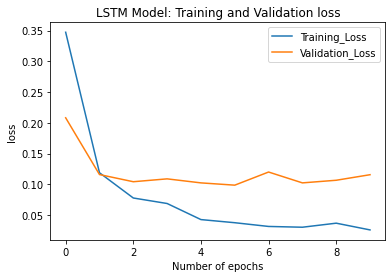

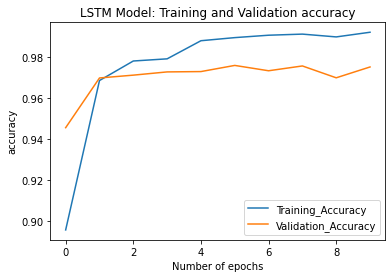

In [ ]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
pol_lstm = Sequential()
pol_lstm.add(Embedding(vocab_s, embed_dim, input_length=max_len))
pol_lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
pol_lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
pol_lstm.add(Dense(1, activation='sigmoid'))
pol_lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

num_epochs = 10
#early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = pol_lstm.fit(training_padd, train_data['pol'], epochs=num_epochs, validation_data=(testing_padd, test_data['pol']), verbose=2)

Epoch 1/10
454/454 - 32s - loss: 0.3177 - accuracy: 0.9172 - val_loss: 0.2802 - val_accuracy: 0.9210 - 32s/epoch - 70ms/step
Epoch 2/10
454/454 - 24s - loss: 0.2636 - accuracy: 0.9173 - val_loss: 0.2164 - val_accuracy: 0.9125 - 24s/epoch - 52ms/step
Epoch 3/10
454/454 - 23s - loss: 0.1958 - accuracy: 0.9249 - val_loss: 0.2107 - val_accuracy: 0.9210 - 23s/epoch - 51ms/step
Epoch 4/10
454/454 - 23s - loss: 0.1682 - accuracy: 0.9372 - val_loss: 0.2091 - val_accuracy: 0.9230 - 23s/epoch - 52ms/step
Epoch 5/10
454/454 - 22s - loss: 0.1589 - accuracy: 0.9374 - val_loss: 0.2334 - val_accuracy: 0.9230 - 22s/epoch - 50ms/step
Epoch 6/10
454/454 - 23s - loss: 0.1566 - accuracy: 0.9370 - val_loss: 0.2055 - val_accuracy: 0.9258 - 23s/epoch - 51ms/step
Epoch 7/10
454/454 - 23s - loss: 0.1310 - accuracy: 0.9486 - val_loss: 0.1997 - val_accuracy: 0.9267 - 23s/epoch - 51ms/step
Epoch 8/10
454/454 - 23s - loss: 0.1103 - accuracy: 0.9580 - val_loss: 0.1985 - val_accuracy: 0.9319 - 23s/epoch - 51ms/step


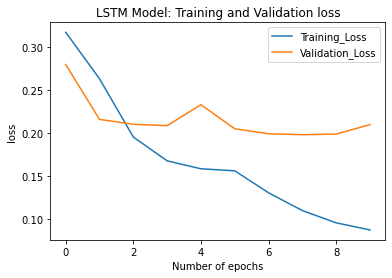

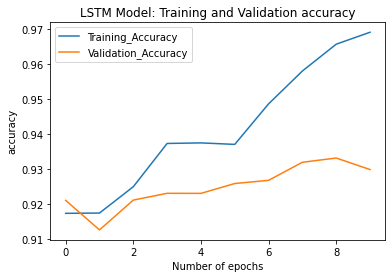

In [ ]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
cin_lstm = Sequential()
cin_lstm.add(Embedding(vocab_s, embed_dim, input_length=max_len))
cin_lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
cin_lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
cin_lstm.add(Dense(1, activation='sigmoid'))
cin_lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

num_epochs = 10
#early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = cin_lstm.fit(training_padd, train_data['cin'], epochs=num_epochs, validation_data=(testing_padd, test_data['cin']), verbose=2)

Epoch 1/10
454/454 - 31s - loss: 0.3903 - accuracy: 0.8673 - val_loss: 0.2757 - val_accuracy: 0.9172 - 31s/epoch - 68ms/step
Epoch 2/10
454/454 - 22s - loss: 0.1652 - accuracy: 0.9456 - val_loss: 0.1751 - val_accuracy: 0.9426 - 22s/epoch - 48ms/step
Epoch 3/10
454/454 - 23s - loss: 0.1070 - accuracy: 0.9652 - val_loss: 0.1889 - val_accuracy: 0.9365 - 23s/epoch - 50ms/step
Epoch 4/10
454/454 - 23s - loss: 0.0864 - accuracy: 0.9724 - val_loss: 0.1711 - val_accuracy: 0.9500 - 23s/epoch - 50ms/step
Epoch 5/10
454/454 - 23s - loss: 0.0801 - accuracy: 0.9728 - val_loss: 0.1795 - val_accuracy: 0.9480 - 23s/epoch - 50ms/step
Epoch 6/10
454/454 - 24s - loss: 0.0842 - accuracy: 0.9741 - val_loss: 0.1817 - val_accuracy: 0.9466 - 24s/epoch - 52ms/step
Epoch 7/10
454/454 - 23s - loss: 0.0662 - accuracy: 0.9796 - val_loss: 0.1906 - val_accuracy: 0.9501 - 23s/epoch - 51ms/step
Epoch 8/10
454/454 - 24s - loss: 0.0577 - accuracy: 0.9822 - val_loss: 0.1826 - val_accuracy: 0.9494 - 24s/epoch - 52ms/step


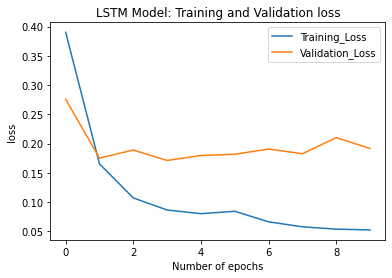

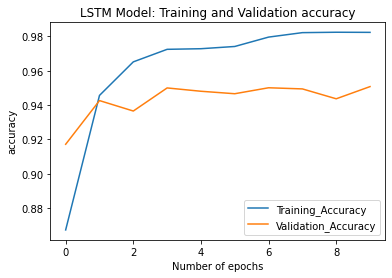

In [ ]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
cin_lstm.save('cin_lstm.h5')
sp_lstm.save('sp_lstm.h5')
pol_lstm.save('pol_lstm.h5')

In [ ]:
wo_lstm.save('wo_lstm.h5')
ind_lstm.save('ind_lstm.h5')
tn_lstm.save('tn_lstm.h5')

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pickle

In [ ]:
max_len = 50
trunc_type = "post"
padding_type = "post"

wo_lstm_path = 'wo_lstm.h5'
ind_lstm_path = 'ind_lstm.h5'
cin_lstm_path = 'cin_lstm.h5'
pol_lstm_path = 'pol_lstm.h5'
sp_lstm_path = 'sp_lstm.h5'
tn_lstm_path = 'tn_lstm.h5'

wo_lstm = keras.models.load_model(wo_lstm_path)
ind_lstm = keras.models.load_model(ind_lstm_path)
cin_lstm = keras.models.load_model(cin_lstm_path)
pol_lstm = keras.models.load_model(pol_lstm_path)
sp_lstm = keras.models.load_model(sp_lstm_path)
tn_lstm = keras.models.load_model(tn_lstm_path)

In [ ]:
def predict_wo(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    res = wo_lstm.predict(padded)
    return np.average(res)

def predict_ind(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    # return (ind_lstm.predict(padded))
    res = ind_lstm.predict(padded)
    return np.average(res)

def predict_tn(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    # return (tn_lstm.predict(padded))
    res = tn_lstm.predict(padded)
    return np.average(res)

def predict_sp(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    # return (tn_lstm.predict(padded))
    res = sp_lstm.predict(padded)
    return np.average(res)

def predict_pol(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    # return (tn_lstm.predict(padded))
    res = pol_lstm.predict(padded)
    return np.average(res)

def predict_cin(predict_msg):
    new_seq = tokenize.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    # return (tn_lstm.predict(padded))
    res = cin_lstm.predict(padded)
    return np.average(res)

predict_msg1=['சென்னையில் பெண் கொல்லப்பட்டார்'] # TN News
predict_msg2=['டெல்லியில் பூகம்பம்'] # India News
predict_msg3=['நடிகர் போதைப்பொருள் பயன்படுத்தி பிடிபட்டார்'] # Cinema News
predict_msg4=['கால்பந்து ரசிகர்களை இழந்து வருகிறது'] # Sports News
predict_msg5=['சுயேச்சை அமைச்சரை டிஸ்மிஸ்'] # Politics News
predict_msg6=['மலேசிய விமானம் காணவில்லை'] # World News

In [ ]:
print(predict_wo(predict_msg1))
print(predict_wo(predict_msg2))
print(predict_wo(predict_msg3))
print(predict_wo(predict_msg4))
print(predict_wo(predict_msg5))
print(predict_wo(predict_msg6))

1/1 [==============================] - 1s 1s/step
0.0050174254
1/1 [==============================] - 0s 44ms/step
0.004846947
1/1 [==============================] - 0s 44ms/step
0.0046939114
1/1 [==============================] - 0s 44ms/step
0.0043195817
1/1 [==============================] - 0s 70ms/step
0.009242148
1/1 [==============================] - 0s 145ms/step
0.9403414


In [ ]:
print(predict_ind(predict_msg1))
print(predict_ind(predict_msg2))
print(predict_ind(predict_msg3))
print(predict_ind(predict_msg4))
print(predict_ind(predict_msg5))
print(predict_ind(predict_msg6))

1/1 [==============================] - 1s 1s/step
0.003669279
1/1 [==============================] - 0s 30ms/step
0.932576
1/1 [==============================] - 0s 33ms/step
0.1432558
1/1 [==============================] - 0s 30ms/step
0.0027521711
1/1 [==============================] - 0s 28ms/step
0.30648854
1/1 [==============================] - 0s 27ms/step
0.005104689


In [ ]:
print(predict_tn(predict_msg1))
print(predict_tn(predict_msg2))
print(predict_tn(predict_msg3))
print(predict_tn(predict_msg4))
print(predict_tn(predict_msg5))
print(predict_tn(predict_msg6))

1/1 [==============================] - 1s 1s/step
0.98519933
1/1 [==============================] - 0s 31ms/step
0.082517855
1/1 [==============================] - 0s 29ms/step
0.17599896
1/1 [==============================] - 0s 30ms/step
0.0062454846
1/1 [==============================] - 0s 27ms/step
0.012001298
1/1 [==============================] - 0s 31ms/step
0.0039417855


In [ ]:
print(predict_sp(predict_msg1))
print(predict_sp(predict_msg2))
print(predict_sp(predict_msg3))
print(predict_sp(predict_msg4))
print(predict_sp(predict_msg5))
print(predict_sp(predict_msg6))

1/1 [==============================] - 1s 1s/step
0.0012686359
1/1 [==============================] - 0s 27ms/step
0.00084310456
1/1 [==============================] - 0s 30ms/step
0.00078421534
1/1 [==============================] - 0s 41ms/step
0.989191
1/1 [==============================] - 0s 30ms/step
0.0047917063
1/1 [==============================] - 0s 26ms/step
0.00934434


In [ ]:
print(predict_pol(predict_msg1))
print(predict_pol(predict_msg2))
print(predict_pol(predict_msg3))
print(predict_pol(predict_msg4))
print(predict_pol(predict_msg5))
print(predict_pol(predict_msg6))

1/1 [==============================] - 3s 3s/step
0.002209456
1/1 [==============================] - 0s 40ms/step
0.2316113
1/1 [==============================] - 0s 35ms/step
0.0032330838
1/1 [==============================] - 0s 36ms/step
0.0018676604
1/1 [==============================] - 0s 32ms/step
0.8637666
1/1 [==============================] - 0s 34ms/step
0.002158484


In [ ]:
print(predict_cin(predict_msg1))
print(predict_cin(predict_msg2))
print(predict_cin(predict_msg3))
print(predict_cin(predict_msg4))
print(predict_cin(predict_msg5))
print(predict_cin(predict_msg6))

1/1 [==============================] - 1s 1s/step
0.009661361
1/1 [==============================] - 0s 31ms/step
0.001051683
1/1 [==============================] - 0s 35ms/step
0.9686442
1/1 [==============================] - 0s 39ms/step
0.0059848996
1/1 [==============================] - 0s 35ms/step
0.0071640946
1/1 [==============================] - 0s 34ms/step
0.004197785


In [ ]:
category_list = ["World news", "India News", "Cinema News", "Politics News", "Sports News", "TN News"]

def show(input_msg):

    wo_res = predict_wo(input_msg)
    ind_res = predict_ind(input_msg)
    cin_res = predict_cin(input_msg)
    pol_res = predict_pol(input_msg)
    sp_res = predict_sp(input_msg)
    tn_res = predict_tn(input_msg)
    res = [wo_res, ind_res, cin_res, pol_res, sp_res, tn_res]
    # for path in lstm_list:
        # val = predict(input_msg, path)
        # res.append(val)

    idx = 0
    max_val = -1
    for i in range(len(res)):
        if res[i] > max_val:
            max_val = res[i]
            idx = i

    print(res)
    print(res[idx])
    category = category_list[idx]
    print(category)

In [ ]:
show(predict_msg1)
show(predict_msg2)
show(predict_msg3)
show(predict_msg4)
show(predict_msg5)
show(predict_msg6)

1/1 [==============================] - 0s 31ms/step
[0.0050174254, 0.003669279, 0.009661361, 0.002209456, 0.0012686359, 0.98519933]
0.98519933
TN News
1/1 [==============================] - 0s 39ms/step
[0.004846947, 0.932576, 0.001051683, 0.2316113, 0.00084310456, 0.082517855]
0.932576
India News
1/1 [==============================] - 0s 34ms/step
[0.0046939114, 0.1432558, 0.9686442, 0.0032330838, 0.00078421534, 0.17599896]
0.9686442
Cinema News
1/1 [==============================] - 0s 44ms/step
[0.0043195817, 0.0027521711, 0.0059848996, 0.0018676604, 0.989191, 0.0062454846]
0.989191
Sports News
1/1 [==============================] - 0s 59ms/step
[0.009242148, 0.30648854, 0.0071640946, 0.8637666, 0.0047917063, 0.012001298]
0.8637666
Politics News
1/1 [==============================] - 0s 48ms/step
[0.9403414, 0.005104689, 0.004197785, 0.002158484, 0.00934434, 0.0039417855]
0.9403414
World news


In [ ]:
pip install tensorflow==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.6/454.6 KB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 KB 20.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully un

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.layers import Flatten,Embedding,Dense
from keras.preprocessing import sequence
from sklearn.feature_selection import RFE
import re
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
train = pd.read_csv('tamil_news_train.csv')
test = pd.read_csv('tamil_news_test.csv')

In [ ]:
# fix random seed for reproducibility
np.random.seed(7)
train = train.drop_duplicates().reset_index(drop=True)
test = test.drop_duplicates().reset_index(drop=True)

In [ ]:
train.NewsInTamil = train.NewsInTamil.str.replace('\d+', ' ')

test.NewsInTamil = test.NewsInTamil.str.replace('\d+', ' ')

    
train = train.append(test)
df = train
df.head()
df.shape

<ipython-input-62-a5b563f1c93c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train.NewsInTamil = train.NewsInTamil.str.replace('\d+', ' ')
<ipython-input-62-a5b563f1c93c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test.NewsInTamil = test.NewsInTamil.str.replace('\d+', ' ')


,NewsInEnglish,NewsInTamil,Category,CategoryInTamil
0,2017/May/19941-miss-iraq-competition-after-43-...,ஈராக்கில் ஆண்டுகள் கழித்து அழகிப்போட்டி,world,உலகம்
1,2018/Dec/55921-viswasam-s-rustic-folk-song-has...,இந்திய அளவில் ட்ரெண்ட் ஆன அஜித்தின் ‘தள்லே தில...,cinema,சினிமா
2,2018/Dec/55929-inspector-who-bought-insurance-...,சொந்த செலவில் வாகன காப்பீடு எடுத்து கொடுத்த கா...,tamilnadu,தமிழ்நாடு
3,2017/Jan/16161-morarji-desai-budget.txt,பிறந்தநாளில் பட்ஜெட் தாக்கல் செய்தவர்,india,இந்தியா
4,2018/Jun/46476-i-have-not-joined-bjp-or-anyoth...,“நானா? பாஜகவில் இணைந்துவிட்டேனா” - வரலட்சுமி வ...,cinema,சினிமா


(13955, 4)

In [ ]:
df.Category.unique()

array(['world', 'cinema', 'tamilnadu', 'india', 'politics', 'sports'],
      dtype=object)

In [ ]:
df.Category = df.Category.replace('world', 1)
df.Category = df.Category.replace('cinema', 2)
df.Category = df.Category.replace('tamilnadu', 3)
df.Category = df.Category.replace('india', 4)
df.Category = df.Category.replace('politics', 5)
df.Category = df.Category.replace('sports', 6)


df.Category.head()

0    1
1    2
2    3
3    4
4    2
Name: Category, dtype: int64

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 32000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 120
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=False)
tokenizer.fit_on_texts(df.NewsInTamil.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 22904 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df.NewsInTamil.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (13955, 120)


In [ ]:
Y = pd.get_dummies(df.Category).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (13955, 6)


In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size=.10)

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_features, train_labels, epochs=5, batch_size=32,validation_split=0.2)
# Final evaluation of the model
model_pred_train = model.predict(train_features)
model_pred_test = model.predict(test_features)
# print(classification_report(test_labels,model_pred_test))
print('LSTM Recurrent Neural Network baseline: ' + str(roc_auc_score(train_labels, model_pred_train)))
print('LSTM Recurrent Neural Network: ' + str(roc_auc_score(test_labels, model_pred_test)))

Epoch 1/5
314/314 [==============================] - 173s 514ms/step - loss: 1.3652 - accuracy: 0.4668 - val_loss: 0.9424 - val_accuracy: 0.6537
Epoch 2/5
314/314 [==============================] - 139s 442ms/step - loss: 0.5481 - accuracy: 0.8123 - val_loss: 0.7916 - val_accuracy: 0.7114
Epoch 3/5
314/314 [==============================] - 140s 445ms/step - loss: 0.1748 - accuracy: 0.9480 - val_loss: 0.9035 - val_accuracy: 0.7082
Epoch 4/5
314/314 [==============================] - 144s 460ms/step - loss: 0.0631 - accuracy: 0.9810 - val_loss: 1.0685 - val_accuracy: 0.6815
Epoch 5/5
44/44 [==============================] - 2s 53ms/step
LSTM Recurrent Neural Network baseline: 0.9922534501284078
LSTM Recurrent Neural Network: 0.9146358863449625


In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 120, 100)          3200000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 120, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm_18 (LSTM)              (None, 100)               80400     
                                                                 
 dense_9 (Dense)             (None, 6)                 606       
                                                                 
Total params: 3,281,006
Trainable params: 3,281,006
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Loss')

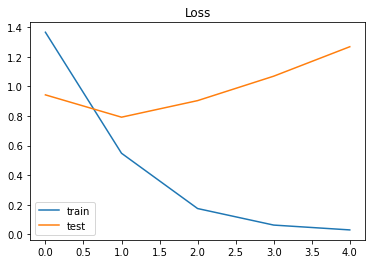

Text(0.5, 1.0, 'Accuracy')

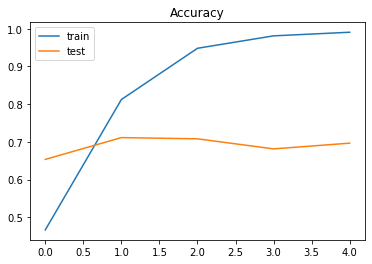

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
news = ['இயற்கையை நேசிப்பதுதானே கொண்டாட்டம்.. இது ஒரு புது முயற்சி..!']
seq = tokenizer.texts_to_sequences(news)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['world', 'cinema', 'tamilnadu', 'india', 'politics', 'sports']
label = pred, labels[np.argmax(pred)]
print("News Category is: ")
print(label[1])

1/1 [==============================] - 0s 51ms/step
News Category is: 
tamilnadu


In [ ]:
predict_msg1=['சென்னையில் பெண் கொல்லப்பட்டார்']
predict_msg2=['டெல்லியில் பூகம்பம்']
predict_msg3=['நடிகர் போதைப்பொருள் பயன்படுத்தி பிடிபட்டார்']
predict_msg4=['கால்பந்து ரசிகர்களை இழந்து வருகிறது']
predict_msg5=['சுயேச்சை அமைச்சரை டிஸ்மிஸ்']
predict_msg6=['மலேசிய விமானம் காணவில்லை']

In [ ]:
def find_predict(news):
    seq = tokenizer.texts_to_sequences(news)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)
    labels = ['world', 'cinema', 'tamilnadu', 'india', 'politics', 'sports']
    label = pred, labels[np.argmax(pred)]
    if label[1]=='tamilnadu':
      print("india")
    else:
      print(label[1])

find_predict(predict_msg1)
find_predict(predict_msg2)
find_predict(predict_msg3)
find_predict(predict_msg4)
find_predict(predict_msg5)
find_predict(predict_msg6)

1/1 [==============================] - 0s 48ms/step
tamilnadu
1/1 [==============================] - 0s 43ms/step
india
1/1 [==============================] - 0s 44ms/step
cinema
1/1 [==============================] - 0s 44ms/step
sports
1/1 [==============================] - 0s 48ms/step
cinema
1/1 [==============================] - 0s 56ms/step
world


In [ ]:

model.save('lstm_baseline.h5')

In [ ]:
from tensorflow import keras

classifier = keras.models.load_model('lstm_baseline.h5')

In [ ]:
def find_predict(news):
    seq = tokenizer.texts_to_sequences(news)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = classifier.predict(padded)
    labels = ['world', 'cinema', 'tamilnadu', 'india', 'politics', 'sports']
    label = pred, labels[np.argmax(pred)]
    print(label[1])

predict_msg1=['சென்னையில் பெண் கொல்லப்பட்டார்']
predict_msg2=['டெல்லியில் பூகம்பம்']
predict_msg3=['நடிகர் போதைப்பொருள் பயன்படுத்தி பிடிபட்டார்']
predict_msg4=['கால்பந்து ரசிகர்களை இழந்து வருகிறது']
predict_msg5=['சுயேச்சை அமைச்சரை டிஸ்மிஸ்']
predict_msg6=['மலேசிய விமானம் காணவில்லை']

find_predict(predict_msg1)
find_predict(predict_msg2)
find_predict(predict_msg3)
find_predict(predict_msg4)
find_predict(predict_msg5)
find_predict(predict_msg6)

1/1 [==============================] - 1s 541ms/step
tamilnadu
1/1 [==============================] - 0s 62ms/step
india
1/1 [==============================] - 0s 72ms/step
cinema
1/1 [==============================] - 0s 82ms/step
sports
1/1 [==============================] - 0s 63ms/step
cinema
1/1 [==============================] - 0s 65ms/step
world


In [ ]:
#@title x
text='\u0B95\u0BBE\u0BB2\u0BCD\u0BAA\u0BA8\u0BCD\u0BA4\u0BC1 \u0BB0\u0B9A\u0BBF\u0B95\u0BB0\u0BCD\u0B95\u0BB3\u0BC8 \u0B87\u0BB4\u0BA8\u0BCD\u0BA4\u0BC1 \u0BB5\u0BB0\u0BC1\u0B95\u0BBF\u0BB1\u0BA4\u0BC1' #@param{type:"string"}
find_predict([text]) 


1/1 [==============================] - 0s 43ms/step
sports


In [ ]:
#!pip install gradio
import gradio as gr

In [ ]:
def find_predic(news):
    l=[news]
    seq = tokenizer.texts_to_sequences(l)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = classifier.predict(padded)
    labels = ['world', 'cinema', 'tamilnadu', 'india', 'politics', 'sports']
    label = pred, labels[np.argmax(pred)]
    return label[1]
iface=gr.Interface(fn=find_predic,inputs="text",outputs="text")
iface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
#pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17414 sha256=754e71eaec713aebd08f91e6f98bad0ffc84a35617d32607285234ba4cbaec01
  Stored in directory: /root/.cache/pip/wheels/a9/25/af/715361fa79594524c89c75d293def652045f3fdce6ca398712
Successfully built googletrans
  Attempting uninstall: googletrans
    Found existing installation: googletrans 3.0.0
    Uninstalling googletrans-3.0.0:
      Successfully uninstalled googletrans-3.0.0


In [ ]:
import googletrans
from googletrans import Translator
translator=Translator()
out=translator.translate("சென்னையில் பெண் கொல்லப்பட்டார்",dest="en")
print(out.text)

ModuleNotFoundError: ignored